# Tweeteval stance detection - evaluation

In [ ]:
import pandas as pd
from pathlib import Path
from sklearn.metrics import classification_report

import seaborn as sns
from scipy.stats import entropy
from collections import Counter

In [ ]:
#FILENAME = "Ewaluacja ChatGPT - zadania - TweetEval - stance detection.csv" # file csv from google sheet

In [ ]:
TOPICS = [
    "abortion",
    "atheism",
    "climate",
    "feminist",
    "hillary",
]

MAPPING = {
    0: "none",
    1: "against",
    2: "favor"
}

RESULTS = ["0", "1", "2"]

In [ ]:
def evaluation(df_stats: pd.DataFrame, y_col: str = "chatgpt_final"):
    try:
        results = classification_report(df_stats["annotation"], df_stats[y_col].astype(int), output_dict=True)

        f1_against = results['1']['f1-score']
        f1_favor = results['2']['f1-score']
        tweeteval_result = (f1_against+f1_favor) / 2
            
    except Exception as ex:
        print(f"Issues with task: {ex}")
        
    return tweeteval_result, results

In [ ]:
#df = pd.read_csv(FILENAME)
df = pd.read_excel('ChatGPT Evaluation v2.0.xlsx', sheet_name='23.TweetStance')
df

,id,prompt,text,annotation,taken,subtask,chatgpt_final,chatgpt_raw,comment
0,0,Assuming that you have to describe the stance ...,#mtp @user How is deleting emails -part of the...,1,1,hillary,1,1,NaN
1,1,Assuming that you have to describe the stance ...,@user @user AndrewWhyDoYouCareAboutWhatIThink?...,1,1,hillary,0,0,NaN
2,2,Assuming that you have to describe the stance ...,The white male vote is solidly GOP. The black ...,1,1,hillary,1,1,NaN
3,3,Assuming that you have to describe the stance ...,@user big banker buds need to ratchet up their...,1,1,hillary,1,1,NaN
4,4,\nAssuming that you have to describe the stanc...,@user Why should I believe you on this? The GO...,1,1,hillary,1,1,NaN
...,...,...,...,...,...,...,...,...,...
1244,275,\nAssuming that you have to describe the stanc...,@user @user I followed him before I watched hu...,0,1,abortion,0,0,NaN
1245,276,\nAssuming that you have to describe the stanc...,"For he who avenges blood remembers, he does no...",1,1,abortion,0,0,NaN
1246,277,\nAssuming that you have to describe the stanc...,Life is sacred on all levels. Abortion does no...,1,1,abortion,1,1,NaN
1247,278,\nAssuming that you have to describe the stanc...,"@user U refer to ""WE"" which =""YOU"" & a minorit...",1,1,abortion,1,1,NaN


In [ ]:
df[df.chatgpt_raw.str.contains(r'[A-Za-z]')]

,id,prompt,text,annotation,taken,subtask,chatgpt_final,chatgpt_raw,comment
823,74,\nAssuming that you have to describe the stanc...,Praise and thank God for everything in your li...,1,1,atheism,2,2 (favor),NaN
824,75,\nAssuming that you have to describe the stanc...,"If Jesus is present, it is impossible for your...",1,1,atheism,2,2 (favor),NaN
825,76,\nAssuming that you have to describe the stanc...,"Heaven and earth will pass away, but My words ...",1,1,atheism,2,2 (favor),NaN
826,77,\nAssuming that you have to describe the stanc...,#KCA #VoteJKT48ID premierdigi: Are Facebook an...,1,1,atheism,2,2 (favor),NaN
827,78,\nAssuming that you have to describe the stanc...,"@user however impossible it may sound, I reall...",1,1,atheism,2,2 (favor),NaN
...,...,...,...,...,...,...,...,...,...
1140,171,\nAssuming that you have to describe the stanc...,@user @user sorry Hilary but I'm #southern and...,1,1,abortion,none,"I'm sorry, but I'm unable to provide you with ...",NaN
1142,173,\nAssuming that you have to describe the stanc...,@user Get out of my city. #ygk #SemST,0,1,abortion,none,"I'm sorry, but I'm unable to provide you with ...",NaN
1145,176,\nAssuming that you have to describe the stanc...,@user lol. I don't know about that. #schoolp...,0,1,abortion,none,"I'm sorry, but I'm unable to provide you with ...","I'm sorry, but I'm unable to provide you with ..."
1148,179,\nAssuming that you have to describe the stanc...,"C7German: Heaven is our Goal, life is our con...",1,1,abortion,none,"I'm sorry, but I'm unable to provide you with ...",NaN


In [ ]:
out_texts = list(df[df.chatgpt_final == "none"].text) # only in topic of abirtion
out_texts

["@user @user @user @user not ashamed to say it's me. I'm not in favor of enc itself as not banning enc modules. #SemST",
 '@user @user "Freedom of Expression? Does that mean that I can display pornography in public if I am against it? #SemST',
 'Obama Administration sends 5.6 million dollars to #SemST',
 "@user @user sorry Hilary but I'm #southern and don't bleed that #rainbow #BleedRed #america #southwillriseagain #SemST",
 '@user Get out of my city. #ygk #SemST',
 "@user lol.  I don't know about that.  #schoolprayer #GovtEndorsementOfHeterosexualMarriage #SemST",
 'C7German: Heaven is our Goal,  life is our conquest  #socialmedia #technology #catholic #SemST']

In [ ]:
df = df[df.chatgpt_final != "none"]
df

,id,prompt,text,annotation,taken,subtask,chatgpt_final,chatgpt_raw,comment
0,0,Assuming that you have to describe the stance ...,#mtp @user How is deleting emails -part of the...,1,1,hillary,1,1,NaN
1,1,Assuming that you have to describe the stance ...,@user @user AndrewWhyDoYouCareAboutWhatIThink?...,1,1,hillary,0,0,NaN
2,2,Assuming that you have to describe the stance ...,The white male vote is solidly GOP. The black ...,1,1,hillary,1,1,NaN
3,3,Assuming that you have to describe the stance ...,@user big banker buds need to ratchet up their...,1,1,hillary,1,1,NaN
4,4,\nAssuming that you have to describe the stanc...,@user Why should I believe you on this? The GO...,1,1,hillary,1,1,NaN
...,...,...,...,...,...,...,...,...,...
1244,275,\nAssuming that you have to describe the stanc...,@user @user I followed him before I watched hu...,0,1,abortion,0,0,NaN
1245,276,\nAssuming that you have to describe the stanc...,"For he who avenges blood remembers, he does no...",1,1,abortion,0,0,NaN
1246,277,\nAssuming that you have to describe the stanc...,Life is sacred on all levels. Abortion does no...,1,1,abortion,1,1,NaN
1247,278,\nAssuming that you have to describe the stanc...,"@user U refer to ""WE"" which =""YOU"" & a minorit...",1,1,abortion,1,1,NaN


In [ ]:
entropy(list(Counter(df.annotation).values())) # dataset entropy

0.9725947967294313

In [ ]:
df.annotation.value_counts()

1    713
2    304
0    225
Name: annotation, dtype: int64

## Results

Results were calculated with the method attached to [Tweeteval github](https://github.com/cardiffnlp/tweeteval). Subtasks in dataset are generalised.

In [ ]:
result, results = evaluation(df)

In [ ]:
pd.DataFrame(results).transpose()

,precision,recall,f1-score,support
0,0.549296,0.520000,0.534247,225.000000
1,0.690780,0.683029,0.686883,713.000000
2,0.450617,0.480263,0.464968,304.000000
accuracy,0.603865,0.603865,0.603865,0.603865
macro avg,0.563564,0.561098,0.562033,1242.000000
weighted avg,0.606365,0.603865,0.604914,1242.000000


In [ ]:
print(f"Average of F1 for against and favor classes: {result}")

Average of F1 for against and favor classes: 0.575925543287846


## Subtask split

In [ ]:
SOTA_FILENAME = "RobertaBase-stance.csv"  # generated from tweeteval stance sota notebook

In [ ]:
sota_df = pd.read_csv(SOTA_FILENAME)
sota_df

,text,roberta,confidence,annotation,subtask,roberta_final
0,Need a ProLife R.E. Agent? - Support a ProLife...,against,0.931517,1,abortion,1
1,Where is the childcare program @user which you...,against,0.509997,1,abortion,1
2,I get several requests with petitions to save ...,against,0.527835,1,abortion,1
3,"we must always see others as Christ sees us,we...",none,0.653959,1,abortion,0
4,PRAYERS FOR BABIES Urgent prayer one in Lexing...,against,0.869390,1,abortion,1
...,...,...,...,...,...,...
1244,.@HillaryClinton Looking 4ward 2 hearing your ...,against,0.973792,2,hillary,1
1245,@user I'm loving it too! Draw that contrast!!!...,none,0.612639,0,hillary,0
1246,"@user Can't stand @user anymore, but hope @use...",none,0.591747,2,hillary,0
1247,Hillary can't create jobs! Last time she had a...,against,0.979370,1,hillary,1


In [ ]:
sota_df = sota_df[~sota_df.text.isin(out_texts)]
sota_df

,text,roberta,confidence,annotation,subtask,roberta_final
0,Need a ProLife R.E. Agent? - Support a ProLife...,against,0.931517,1,abortion,1
1,Where is the childcare program @user which you...,against,0.509997,1,abortion,1
2,I get several requests with petitions to save ...,against,0.527835,1,abortion,1
3,"we must always see others as Christ sees us,we...",none,0.653959,1,abortion,0
4,PRAYERS FOR BABIES Urgent prayer one in Lexing...,against,0.869390,1,abortion,1
...,...,...,...,...,...,...
1244,.@HillaryClinton Looking 4ward 2 hearing your ...,against,0.973792,2,hillary,1
1245,@user I'm loving it too! Draw that contrast!!!...,none,0.612639,0,hillary,0
1246,"@user Can't stand @user anymore, but hope @use...",none,0.591747,2,hillary,0
1247,Hillary can't create jobs! Last time she had a...,against,0.979370,1,hillary,1


In [ ]:
pd.DataFrame(evaluation(sota_df, y_col='roberta_final')[1])

,0,1,2,accuracy,macro avg,weighted avg
precision,0.573477,0.850467,0.563084,0.689211,0.662343,0.729946
recall,0.711111,0.638149,0.792763,0.689211,0.714008,0.689211
f1-score,0.634921,0.729167,0.658470,0.689211,0.674186,0.694789
support,225.000000,713.000000,304.000000,0.689211,1242.000000,1242.000000


In [ ]:
print(f"Average of F1 for against and favor classes: {evaluation(sota_df, y_col='roberta_final')[0]}")

Average of F1 for against and favor classes: 0.6938183060109289


In [ ]:
compare_results = {
    "subtask": [],
    "GPT": [],
    "SOTA": []
} 

for topic in TOPICS:
    compare_results["subtask"].append(topic)
    compare_results["GPT"].append(
        evaluation(df[df.subtask == topic])[0]
    )
    compare_results["SOTA"].append(
        evaluation(sota_df[sota_df.subtask == topic], y_col="roberta_final")[0]
    ) 

/home/oliwier/anaconda3/envs/representation/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oliwier/anaconda3/envs/representation/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oliwier/anaconda3/envs/representation/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
results_df = pd.DataFrame(compare_results)
results_df

,subtask,GPT,SOTA
0,abortion,0.655399,0.523074
1,atheism,0.156130,0.751496
2,climate,0.384037,0.446215
3,feminist,0.704303,0.599943
4,hillary,0.796993,0.689560


In [ ]:
melted_df = results_df[["GPT", "SOTA"]].melt(var_name="model", value_name="F1 avg")
x = pd.concat([results_df]*2, ignore_index=True)
x = x.drop(["GPT", "SOTA"], axis=1)
melted_df["subtask"] = x["subtask"]
melted_df

,model,F1 avg,subtask
0,GPT,0.655399,abortion
1,GPT,0.156130,atheism
2,GPT,0.384037,climate
3,GPT,0.704303,feminist
4,GPT,0.796993,hillary
5,SOTA,0.523074,abortion
6,SOTA,0.751496,atheism
7,SOTA,0.446215,climate
8,SOTA,0.599943,feminist
9,SOTA,0.689560,hillary


[Text(0.5, 1.0, 'Results comparition with F1 average')]

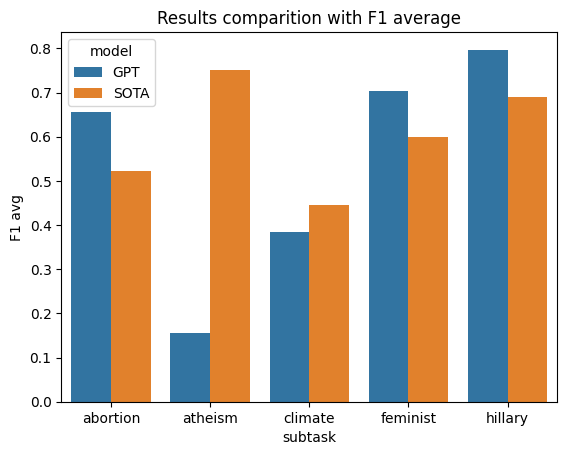

In [ ]:
sns.barplot(data=melted_df, x="subtask", y="F1 avg", hue="model").set(title='Results comparition with F1 average')